In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso

# DataSet Iris

In [3]:
a=pd.read_csv(r"E:\Python Data Science\Documents\14_Iris - 14_Iris.csv")
a

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
a.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
a.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
a.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [8]:
a.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

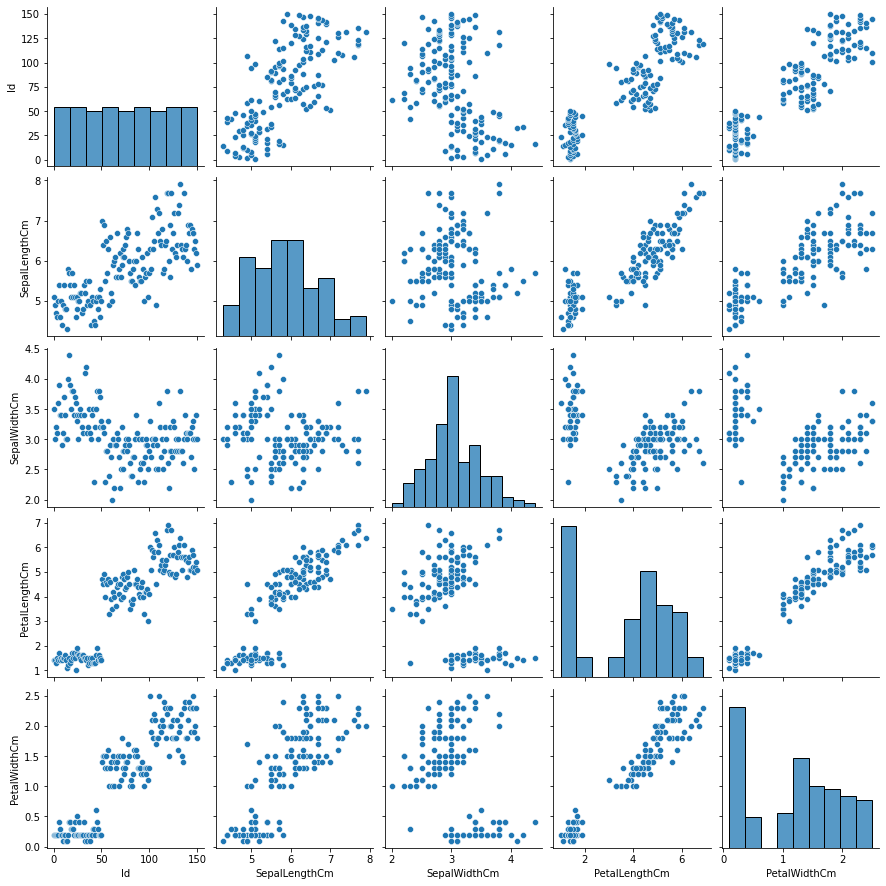

In [9]:
sns.pairplot(a)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

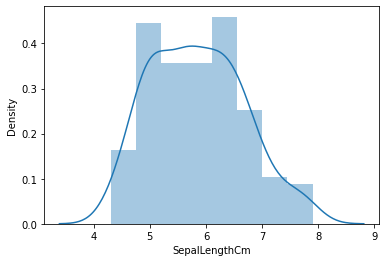

In [10]:
#normal distribution
sns.distplot(a['SepalLengthCm'])

<AxesSubplot:>

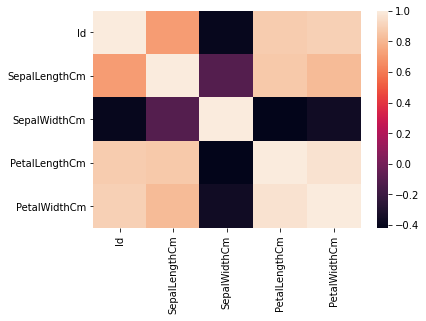

In [11]:
# Correlation map
sns.heatmap(a.corr())

In [12]:
x=a[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=a['PetalWidthCm']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [14]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [15]:
print(lr.intercept_)

-3.597122599785507e-14


In [16]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
Id,4.648671e-16
SepalLengthCm,2.513087e-16
SepalWidthCm,-2.489113e-16
PetalLengthCm,2.249397e-16
PetalWidthCm,1.000000e+00


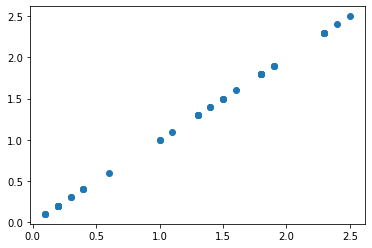

In [17]:
#Predicting

prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [18]:
# Score

print(lr.score(x_test,y_test))

1.0


In [19]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [20]:
#Ridge Score
rr.score(x_test,y_test)

0.9786700784478851

In [21]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [22]:
# Lasso Score
la.score(x_test,y_test)

0.6905868112671385

In [23]:
from sklearn.linear_model import ElasticNet

In [24]:
from sklearn import metrics

In [25]:
# ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [26]:
print(en.coef_)

[ 0.01524731  0.         -0.          0.          0.        ]


In [27]:
print(en.intercept_)

0.05351331748018806


In [28]:
print(en.predict(x_test))

[1.94418006 0.63291119 1.1360725  1.76121231 2.12714781 0.86162088
 0.37370688 1.41052413 0.78538432 1.59349187 1.56299725 2.29486825
 1.05983594 1.53250263 0.22123375 0.17549182 1.34953488 1.71547037
 0.29747032 0.54142732 1.502008   1.8679435  0.31271763 0.75488969
 0.4042015  2.15764244 2.32536287 0.58716925 1.60873919 0.70914775
 1.09033056 0.25172838 1.89843812 2.27962094 1.36478219 1.258051
 0.72439507 1.83744887 0.90736281 1.02934131 0.81587894 1.48676069
 2.00516931 0.34321225 2.20338437]


In [29]:
print(en.score(x_test,y_test))

0.8027759123466562


In [30]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error: 1.7799342247018204e-14


In [31]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))

Mean Squared Error: 4.118263506355188e-28


In [32]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error: 2.0293505134291583e-14


# DataSet HorseRacing

In [33]:
a=pd.read_csv(r"E:\Python Data Science\Documents\15_Horse Racing Results.CSV - 15_Horse Racing Results.CSV.csv")
a

,Dato,Track,Race Number,Distance,Surface,Prize money,Starting position,Jockey,Jockey weight,Country,...,TrainerName,Race time,Path,Final place,FGrating,Odds,RaceType,HorseId,JockeyId,TrainerID
0,03.09.2017,Sha Tin,10,1400,Gress,1310000,6,K C Leung,52,Sverige,...,CH Yip,"83,38",2,9,110,22,Handicap,1736,8656,6687
1,16.09.2017,Sha Tin,10,1400,Gress,1310000,14,C Y Ho,52,Sverige,...,CH Yip,"81,56",3,4,124,48,Handicap,1736,8659,6687
2,14.10.2017,Sha Tin,10,1400,Gress,1310000,8,C Y Ho,52,Sverige,...,CH Yip,"82,36",1,6,118,11,Handicap,1736,8659,6687
3,11.11.2017,Sha Tin,9,1600,Gress,1310000,13,Brett Prebble,54,Sverige,...,CH Yip,"96,53",0,8,107,11,Handicap,1736,8453,6687
4,26.11.2017,Sha Tin,9,1600,Gress,1310000,9,C Y Ho,52,Sverige,...,CH Yip,"94,17",0,3,123,40,Handicap,1736,8659,6687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27003,14.06.2020,Sha Tin,11,1200,Gress,1450000,6,A Hamelin,59,Australia,...,WY So,"70,87",1,9,104,25,Handicap,29038,9111,6683
27004,21.06.2020,Sha Tin,2,1200,Gress,967000,7,K C Leung,57,Australia,...,KL Man,"69,91",2,5,110,124,Handicap,29056,8656,6693
27005,21.06.2020,Sha Tin,4,1200,Gress,967000,6,Blake Shinn,57,Australia,...,P O'Sullivan,"69,49",0,3,114,88,Handicap,29057,8778,6691
27006,21.06.2020,Sha Tin,5,1200,Gress,967000,14,Joao Moreira,57,New Zealand,...,AS Cruz,"70,08",2,7,109,22,Handicap,29058,8443,6684


In [34]:
a.head(16)

,Dato,Track,Race Number,Distance,Surface,Prize money,Starting position,Jockey,Jockey weight,Country,...,TrainerName,Race time,Path,Final place,FGrating,Odds,RaceType,HorseId,JockeyId,TrainerID
0,03.09.2017,Sha Tin,10,1400,Gress,1310000,6,K C Leung,52,Sverige,...,CH Yip,"83,38",2,9,110,22,Handicap,1736,8656,6687
1,16.09.2017,Sha Tin,10,1400,Gress,1310000,14,C Y Ho,52,Sverige,...,CH Yip,"81,56",3,4,124,48,Handicap,1736,8659,6687
2,14.10.2017,Sha Tin,10,1400,Gress,1310000,8,C Y Ho,52,Sverige,...,CH Yip,"82,36",1,6,118,11,Handicap,1736,8659,6687
3,11.11.2017,Sha Tin,9,1600,Gress,1310000,13,Brett Prebble,54,Sverige,...,CH Yip,"96,53",0,8,107,11,Handicap,1736,8453,6687
4,26.11.2017,Sha Tin,9,1600,Gress,1310000,9,C Y Ho,52,Sverige,...,CH Yip,"94,17",0,3,123,40,Handicap,1736,8659,6687
5,10.12.2017,Sha Tin,1,1800,Gress,1310000,4,C Y Ho,52,Sverige,...,CH Yip,"107,92",2,3,123,"8,1",Handicap,1736,8659,6687
6,01.01.2018,Sha Tin,9,1800,Gress,1310000,9,C Schofield,54,Sverige,...,CH Yip,"108,63",5,1,125,"6,9",Handicap,1736,8655,6687
7,04.02.2018,Sha Tin,5,1800,Gress,1310000,6,Joao Moreira,57,Sverige,...,CH Yip,"108,19",0,4,122,"3,7",Handicap,1736,8443,6687
8,03.03.2018,Sha Tin,8,1800,Gress,1310000,3,C Y Ho,56,Sverige,...,CH Yip,"107,65",1,3,125,9,Handicap,1736,8659,6687
9,11.03.2018,Sha Tin,10,1600,Gress,1310000,8,C Y Ho,57,Sverige,...,CH Yip,"94,46",1,6,124,14,Handicap,1736,8659,6687


In [35]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27008 entries, 0 to 27007
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dato               27008 non-null  object
 1   Track              27008 non-null  object
 2   Race Number        27008 non-null  int64 
 3   Distance           27008 non-null  int64 
 4   Surface            27008 non-null  object
 5   Prize money        27008 non-null  int64 
 6   Starting position  27008 non-null  int64 
 7   Jockey             27008 non-null  object
 8   Jockey weight      27008 non-null  int64 
 9   Country            27008 non-null  object
 10  Horse age          27008 non-null  int64 
 11  TrainerName        27008 non-null  object
 12  Race time          27008 non-null  object
 13  Path               27008 non-null  int64 
 14  Final place        27008 non-null  int64 
 15  FGrating           27008 non-null  int64 
 16  Odds               27008 non-null  objec

In [36]:
a.describe()

,Race Number,Distance,Prize money,Starting position,Jockey weight,Horse age,Path,Final place,FGrating,HorseId,JockeyId,TrainerID
count,27008.000000,27008.000000,2.700800e+04,27008.000000,27008.000000,27008.000000,27008.000000,27008.000000,27008.000000,27008.000000,27008.000000,27008.000000
mean,5.268624,1401.666173,1.479445e+06,6.741447,55.867373,5.246408,1.678021,6.685834,113.428318,23904.874889,8586.732042,6668.559205
std,2.780088,276.065045,2.162109e+06,3.691071,2.737006,1.519880,1.631784,3.664551,13.314949,2028.860311,569.616932,79.978067
min,1.000000,1000.000000,6.600000e+05,1.000000,47.000000,2.000000,0.000000,1.000000,-5.000000,1736.000000,227.000000,6431.000000
25%,3.000000,1200.000000,9.200000e+05,4.000000,54.000000,4.000000,0.000000,4.000000,106.000000,22364.000000,8651.000000,6683.000000
50%,5.000000,1400.000000,9.670000e+05,7.000000,56.000000,5.000000,1.000000,7.000000,114.000000,22868.500000,8658.000000,6687.000000
75%,8.000000,1650.000000,1.450000e+06,10.000000,58.000000,6.000000,3.000000,10.000000,122.000000,25310.000000,8663.000000,6693.000000
max,11.000000,2400.000000,2.800000e+07,14.000000,63.000000,12.000000,11.000000,14.000000,157.000000,29059.000000,9113.000000,7004.000000


In [37]:
a.isna()

,Dato,Track,Race Number,Distance,Surface,Prize money,Starting position,Jockey,Jockey weight,Country,...,TrainerName,Race time,Path,Final place,FGrating,Odds,RaceType,HorseId,JockeyId,TrainerID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
a.columns

Index(['Dato', 'Track', 'Race Number', 'Distance', 'Surface', 'Prize money',
       'Starting position', 'Jockey', 'Jockey weight', 'Country', 'Horse age',
       'TrainerName', 'Race time', 'Path', 'Final place', 'FGrating', 'Odds',
       'RaceType', 'HorseId', 'JockeyId', 'TrainerID'],
      dtype='object')

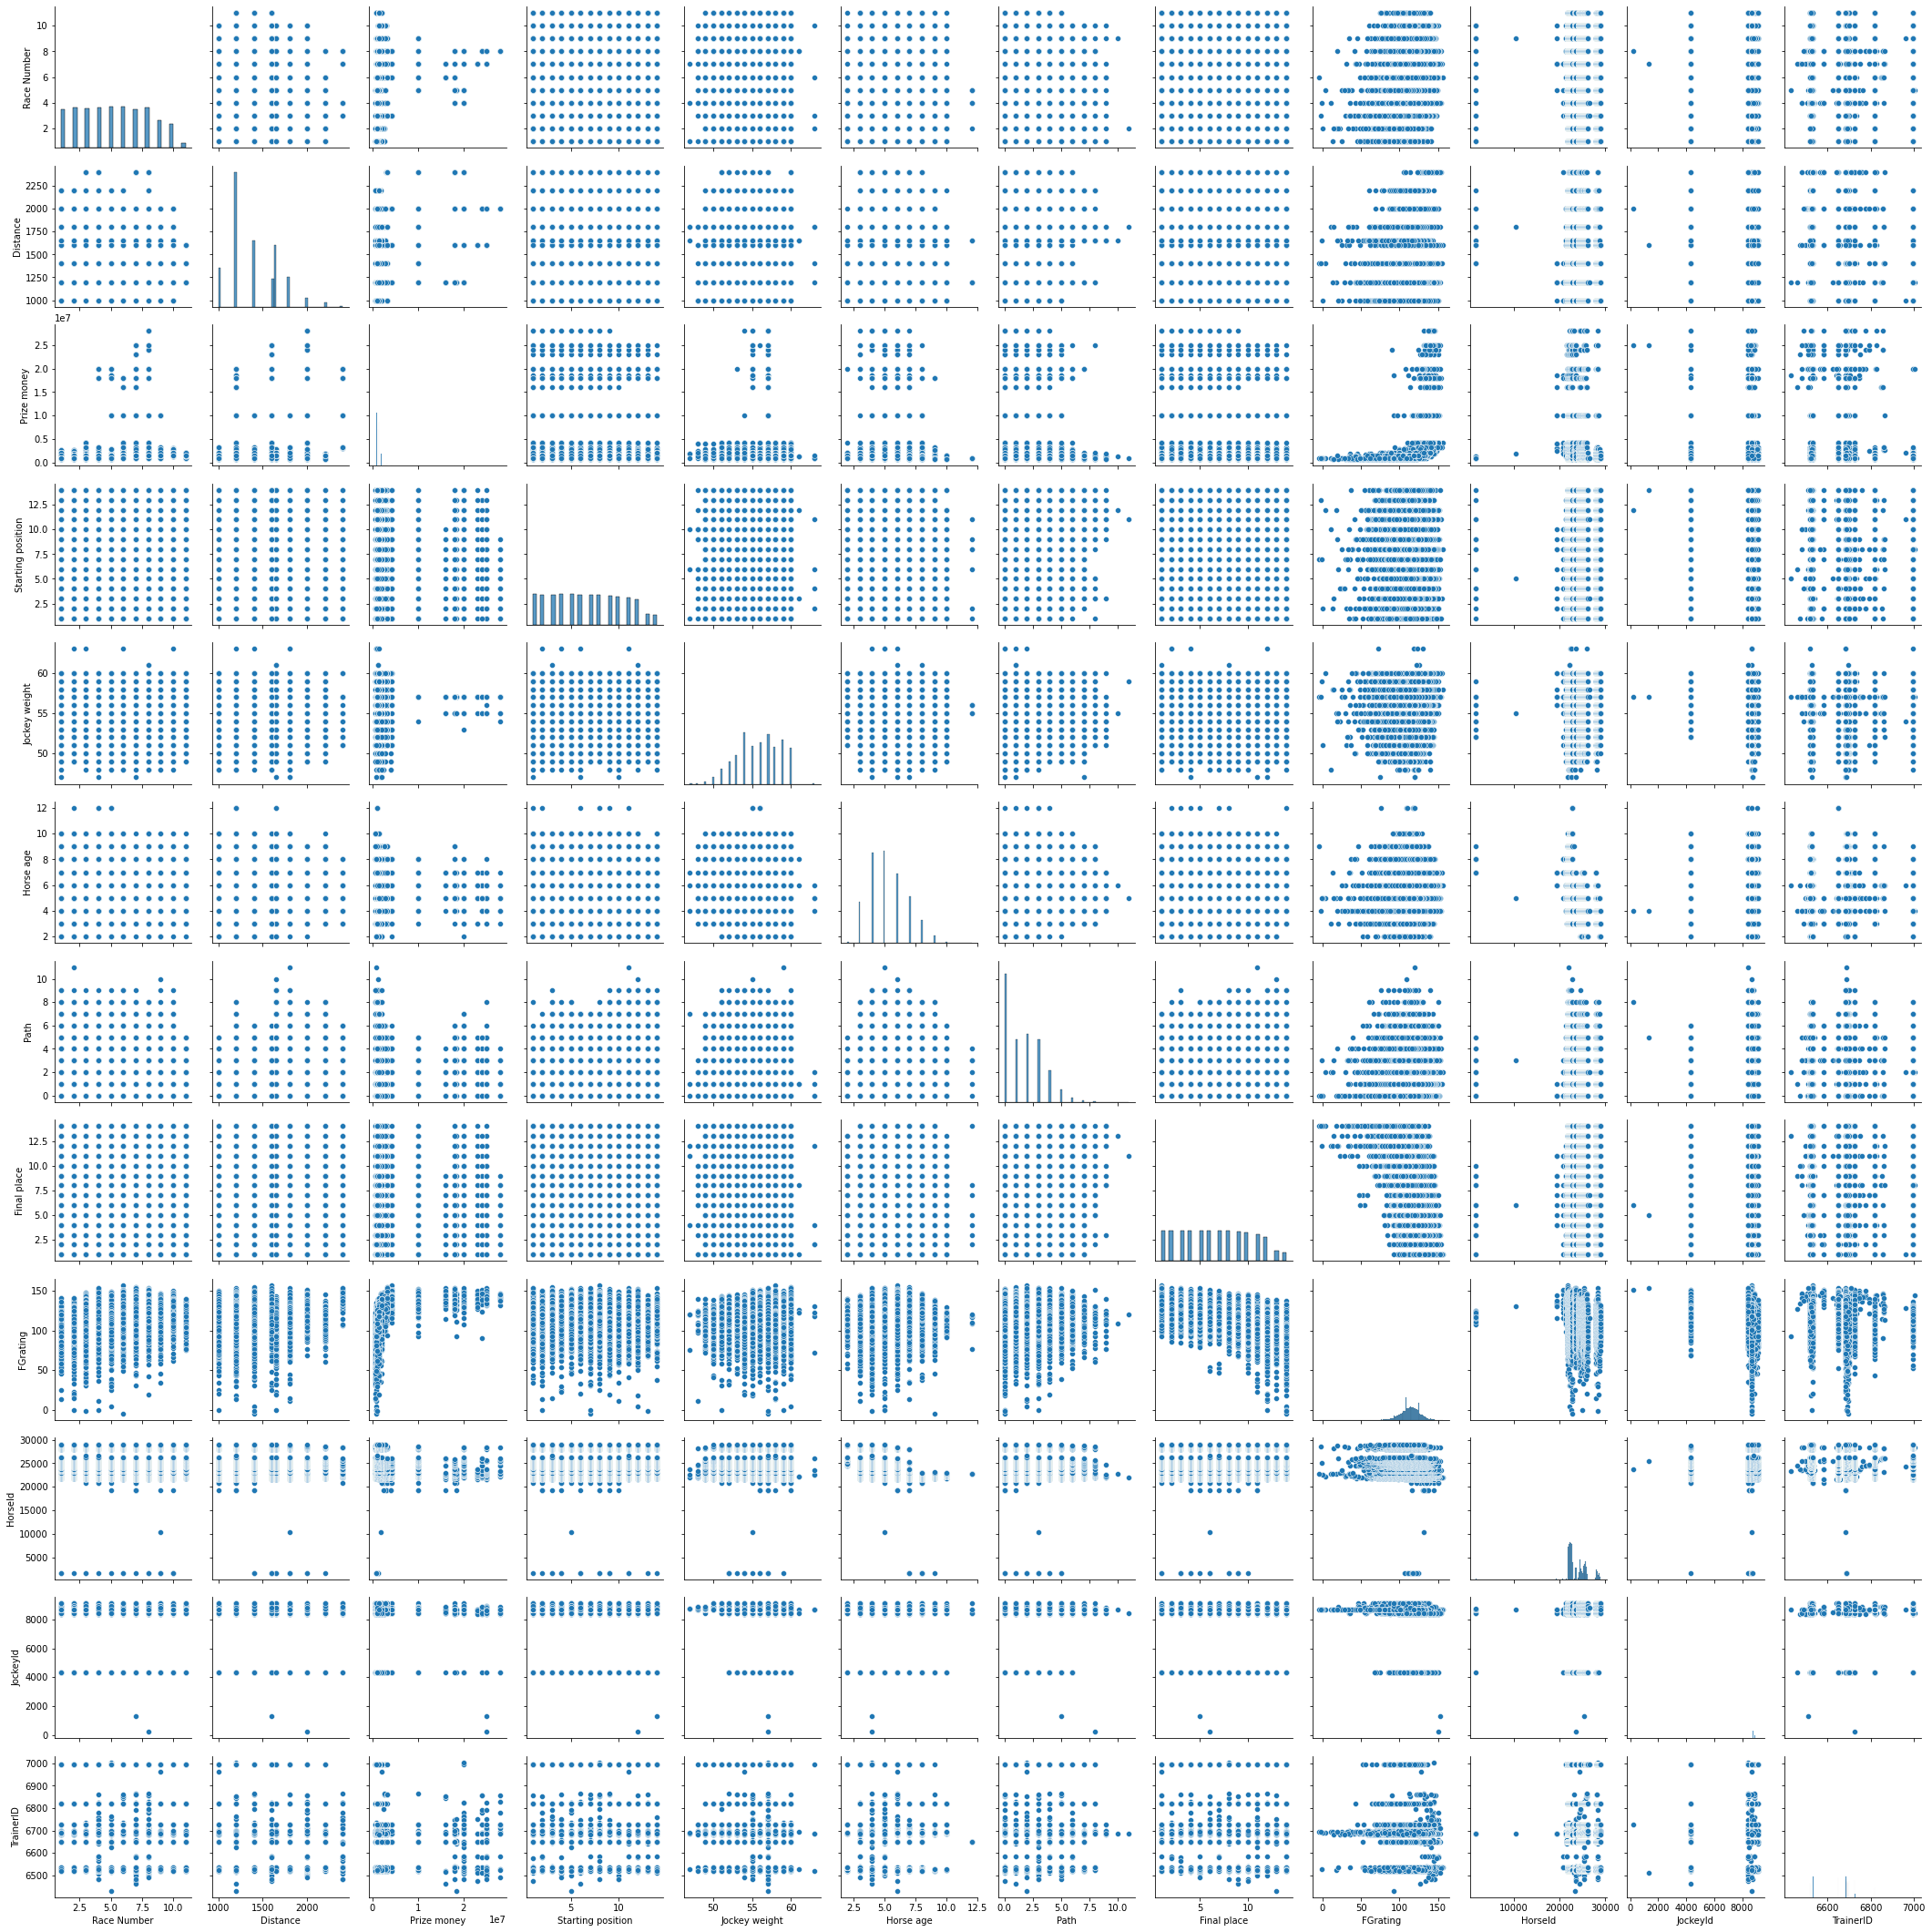

In [39]:
sns.pairplot(a)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Starting position', ylabel='Density'>

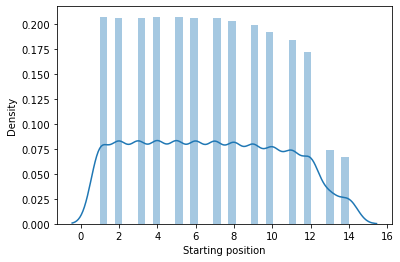

In [40]:
#normal distribution
sns.distplot(a['Starting position'])

<AxesSubplot:>

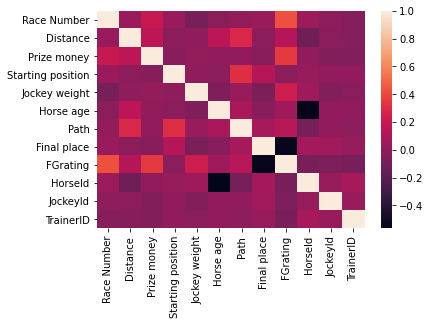

In [41]:
# Correlation map
sns.heatmap(a.corr())

In [42]:
x=a[['Race Number', 'Distance', 'Prize money',
       'Starting position', 'Jockey weight', 'Horse age',
         'TrainerID']]
y=a['Horse age']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [44]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
print(lr.intercept_)

1.4299672557172016e-13


In [46]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
Race Number,3.857115e-17
Distance,-6.112868e-18
Prize money,3.482329e-25
Starting position,-1.715475e-16
Jockey weight,1.792329e-16
Horse age,1.000000e+00
TrainerID,-2.245964e-17


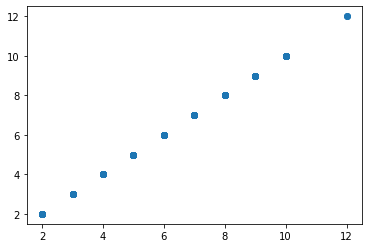

In [47]:
#Predicting

prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [48]:
# Score

print(lr.score(x_test,y_test))

1.0


In [49]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)


Ridge(alpha=10)

In [50]:
#Ridge Score
rr.score(x_test,y_test)

0.999999946264879

In [51]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [52]:
# Lasso Score
la.score(x_test,y_test)

0.025905741596442544

In [53]:
# ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [54]:
print(en.coef_)

[-0.00000000e+00  3.10978317e-04 -5.22432939e-09 -0.00000000e+00
 -0.00000000e+00  6.36945747e-01  1.06123225e-05]


In [55]:
print(en.intercept_)

1.4040729217967711


In [56]:
print(en.predict(x_test))

[5.08834021 5.09049604 5.33509591 ... 3.81660636 7.07892195 3.69212098]


In [57]:
print(en.score(x_test,y_test))

0.8717244877350929


In [58]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error: 2.2693325820389416e-15


In [59]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))

Mean Squared Error: 8.503510210421775e-30


In [60]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error: 2.9160778814053946e-15


# DatSet Health and lifestyle

In [61]:
a=pd.read_csv(r"E:\Python Data Science\Documents\16_Sleep_health_and_lifestyle_dataset - 16_Sleep_health_and_lifestyle_dataset.csv")
a

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [62]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [63]:
a.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [64]:
a.isna()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
a.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

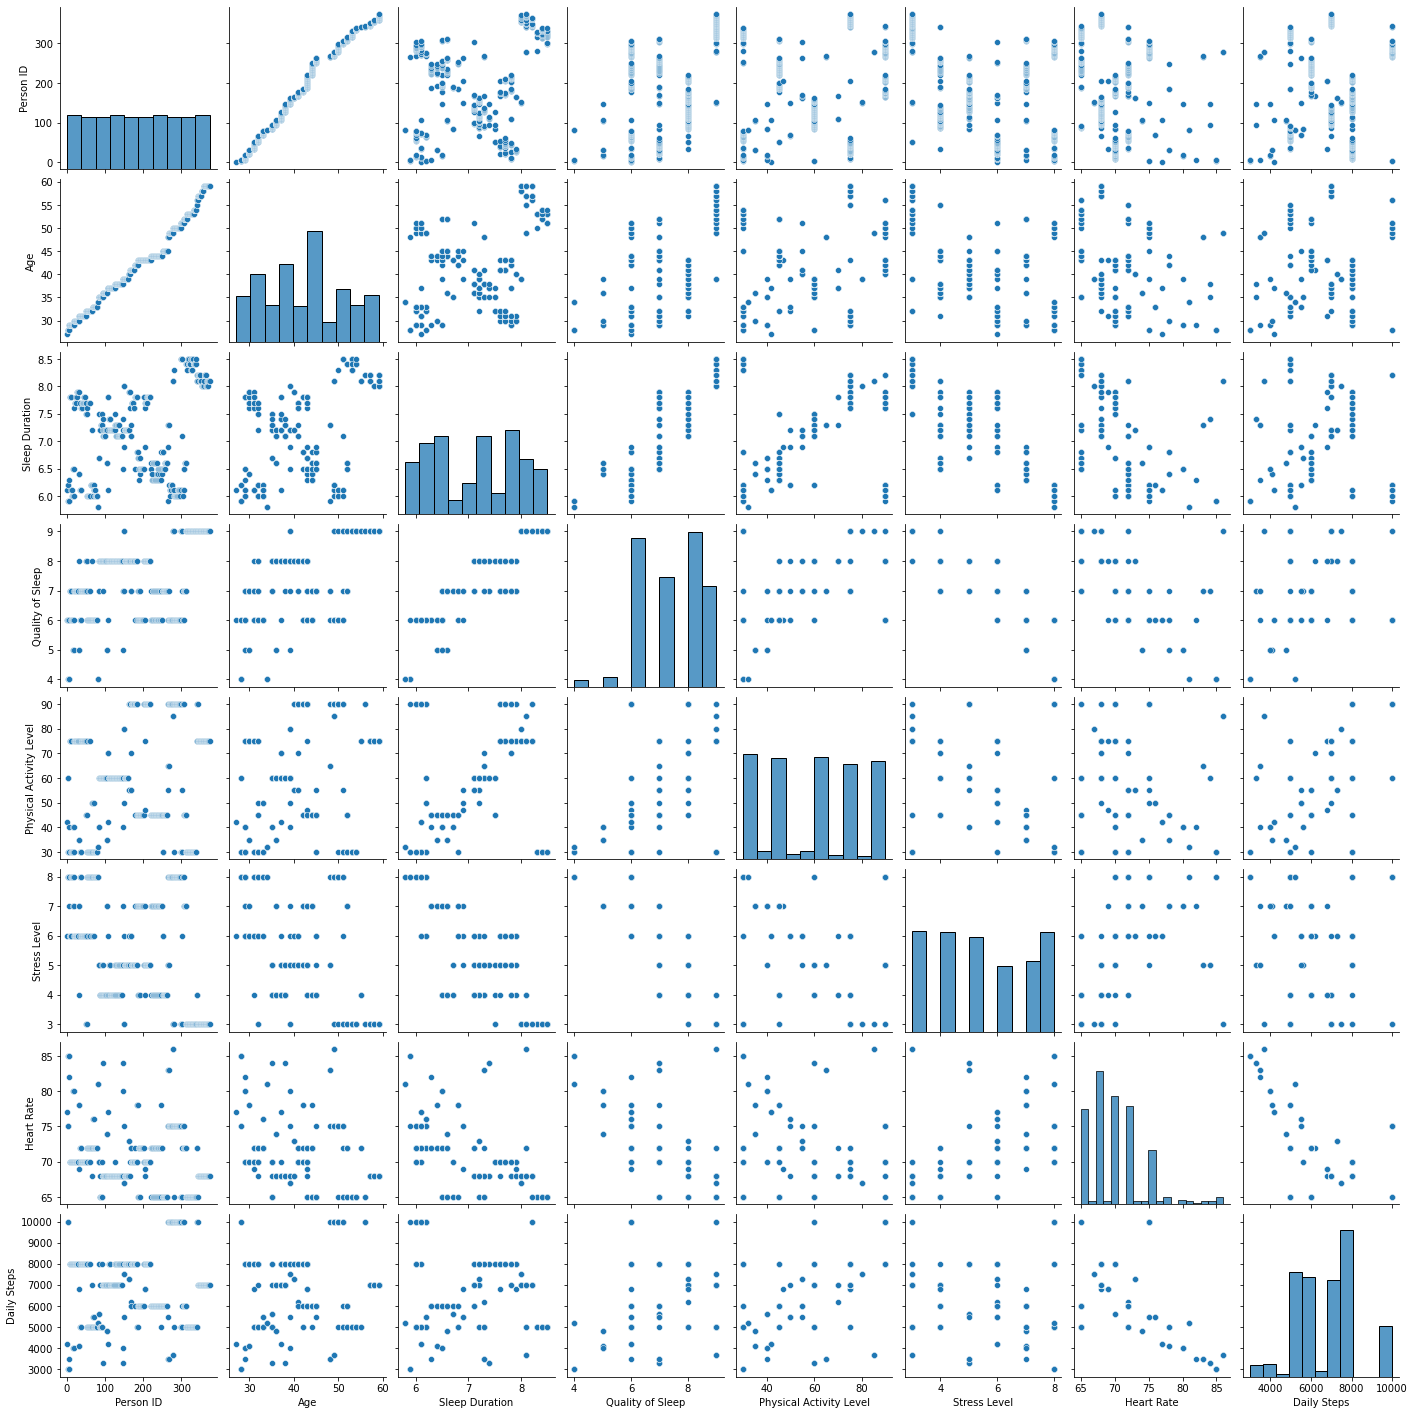

In [66]:
sns.pairplot(a)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sleep Duration', ylabel='Density'>

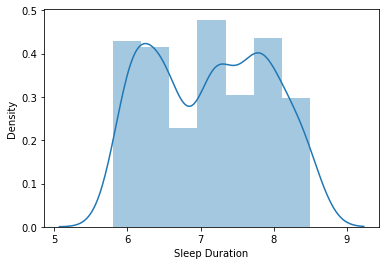

In [67]:
#normal distribution
sns.distplot(a['Sleep Duration'])

<AxesSubplot:>

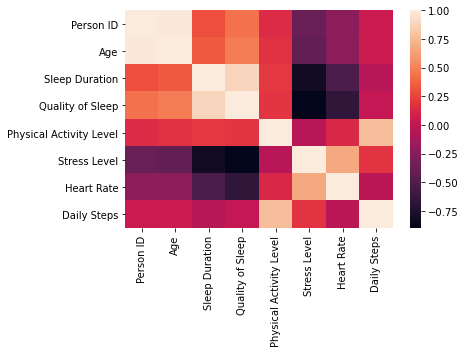

In [68]:
# Correlation map
sns.heatmap(a.corr())

In [69]:
x=a[['Person ID', 'Age', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'Heart Rate', 'Daily Steps']]
y=a['Daily Steps']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [71]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
print(lr.intercept_)

1.6370904631912708e-11


In [73]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
Person ID,3.298465e-14
Age,-4.094066e-13
Sleep Duration,7.304763e-14
Quality of Sleep,-1.030341e-14
Physical Activity Level,-2.126181e-15
Stress Level,2.033339e-13
Heart Rate,-6.589189e-14
Daily Steps,1.000000e+00


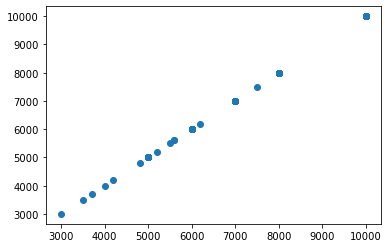

In [74]:
#Predicting

prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [75]:
# Score

print(lr.score(x_test,y_test))

1.0


In [76]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [77]:
#Ridge Score
rr.score(x_test,y_test)

0.9999999999999981

In [78]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [79]:
# Lasso Score
la.score(x_test,y_test)

0.9999999999846246

In [80]:
# ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [81]:
print(en.coef_)

[ 0.          0.         -0.          0.          0.          0.
 -0.          0.99999961]


In [82]:
print(en.intercept_)

0.002648596794642799


In [83]:
print(en.predict(x_test))

[6000.00030354 7999.99952185 7999.99952185 6200.00022537 6999.9999127
 5000.00069438 6000.00030354 5600.00045988 6999.9999127  6000.00030354
 7999.99952185 6999.9999127  5200.00061621 3700.00120248 7999.99952185
 9999.99874017 7999.99952185 7999.99952185 5000.00069438 6000.00030354
 9999.99874017 7999.99952185 7999.99952185 6000.00030354 6999.9999127
 6000.00030354 7999.99952185 6999.9999127  5600.00045988 7999.99952185
 6999.9999127  6999.9999127  5000.00069438 7999.99952185 9999.99874017
 5000.00069438 7999.99952185 7499.99971728 5000.00069438 9999.99874017
 9999.99874017 6999.9999127  7999.99952185 7999.99952185 6999.9999127
 6999.9999127  7999.99952185 5000.00069438 7999.99952185 3000.00147607
 7999.99952185 7999.99952185 7999.99952185 9999.99874017 5000.00069438
 9999.99874017 6000.00030354 5000.00069438 7999.99952185 5000.00069438
 9999.99874017 7999.99952185 4800.00077255 7999.99952185 6999.9999127
 7999.99952185 5500.00049896 5000.00069438 6000.00030354 9999.99874017
 7999.9995

In [84]:
print(en.score(x_test,y_test))

0.9999999999998462


In [85]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error: 7.766923780627219e-13


In [86]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))

Mean Squared Error: 1.0083551272493767e-24


In [87]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error: 1.0041688738700163e-12


# DataSet StudentMarks

In [88]:
a=pd.read_csv(r"E:\Python Data Science\Documents\17_student_marks - 17_student_marks.csv")
a

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
0,22000,78,87,91,91,88,98,94,100,100,100,100,93
1,22001,79,71,81,72,73,68,59,69,59,60,61,67
2,22002,66,65,70,74,78,86,87,96,88,82,90,86
3,22003,60,58,54,61,54,57,64,62,72,63,72,76
4,22004,99,95,96,93,97,89,92,98,91,98,95,88
5,22005,41,36,35,28,35,36,27,26,19,22,27,31
6,22006,47,50,47,57,62,64,71,75,85,87,85,89
7,22007,84,74,70,68,58,59,56,56,64,70,67,59
8,22008,74,64,58,57,53,51,47,45,42,43,34,24
9,22009,87,81,73,74,71,63,53,45,39,43,46,38


In [89]:
a.head()

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
0,22000,78,87,91,91,88,98,94,100,100,100,100,93
1,22001,79,71,81,72,73,68,59,69,59,60,61,67
2,22002,66,65,70,74,78,86,87,96,88,82,90,86
3,22003,60,58,54,61,54,57,64,62,72,63,72,76
4,22004,99,95,96,93,97,89,92,98,91,98,95,88


In [90]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Student_ID  56 non-null     int64
 1   Test_1      56 non-null     int64
 2   Test_2      56 non-null     int64
 3   Test_3      56 non-null     int64
 4   Test_4      56 non-null     int64
 5   Test_5      56 non-null     int64
 6   Test_6      56 non-null     int64
 7   Test_7      56 non-null     int64
 8   Test_8      56 non-null     int64
 9   Test_9      56 non-null     int64
 10  Test_10     56 non-null     int64
 11  Test_11     56 non-null     int64
 12  Test_12     56 non-null     int64
dtypes: int64(13)
memory usage: 5.8 KB


In [91]:
a.describe()

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,22027.500000,70.750000,69.196429,68.089286,67.446429,67.303571,66.000000,66.160714,65.303571,64.392857,64.250000,64.517857,65.928571
std,16.309506,17.009356,17.712266,18.838333,19.807179,20.746890,21.054043,21.427914,22.728372,23.211814,22.598673,22.610529,22.464402
min,22000.000000,40.000000,34.000000,35.000000,28.000000,26.000000,29.000000,26.000000,19.000000,9.000000,12.000000,19.000000,20.000000
25%,22013.750000,57.750000,55.750000,53.000000,54.500000,53.750000,50.250000,47.000000,45.750000,44.000000,45.750000,46.750000,46.750000
50%,22027.500000,70.500000,68.500000,70.000000,71.500000,69.000000,65.500000,64.000000,67.500000,65.500000,65.500000,64.000000,67.500000
75%,22041.250000,84.000000,83.250000,85.000000,84.000000,85.250000,83.750000,85.250000,83.250000,84.250000,83.250000,84.000000,86.500000
max,22055.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [92]:
a.isna()

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [93]:
a.columns

Index(['Student_ID', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5',
       'Test_6', 'Test_7', 'Test_8', 'Test_9', 'Test_10', 'Test_11',
       'Test_12'],
      dtype='object')

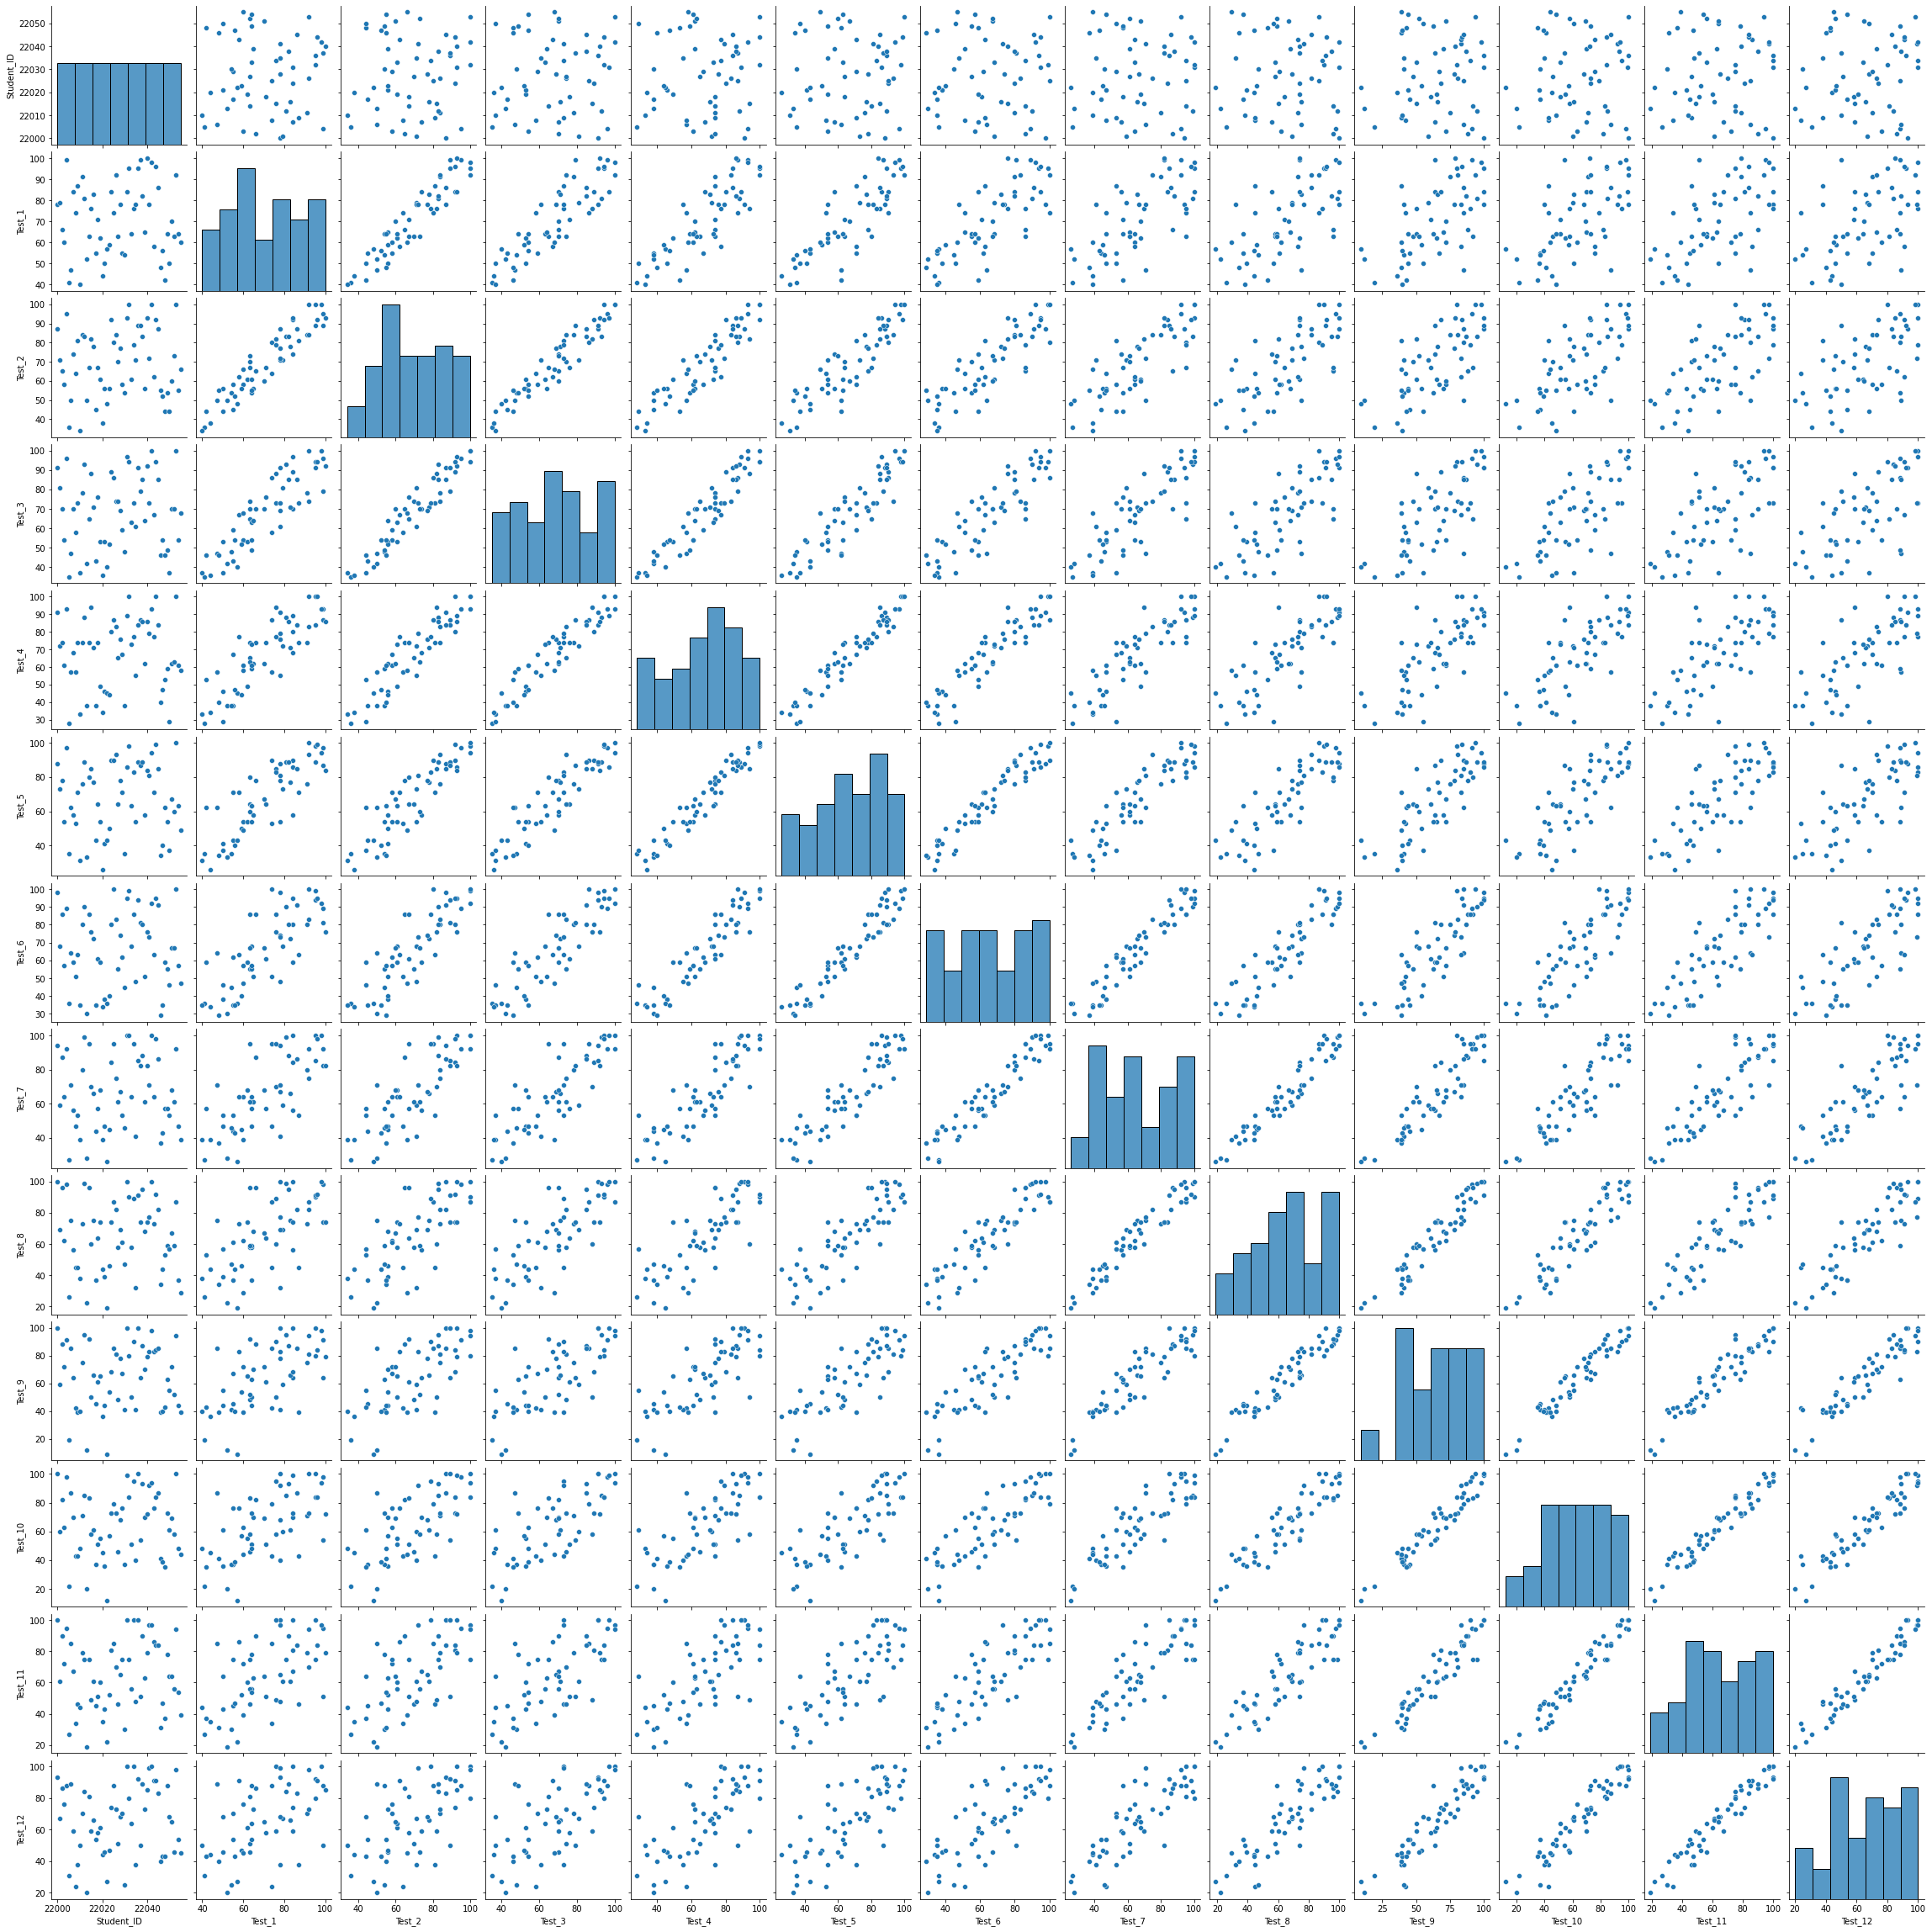

In [94]:
sns.pairplot(a)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Test_1', ylabel='Density'>

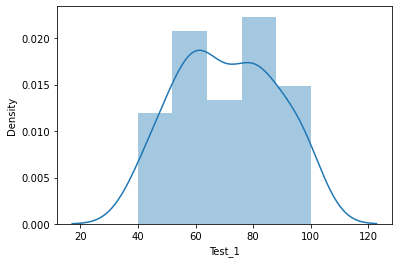

In [95]:
#normal distribution
sns.distplot(a['Test_1'])

<AxesSubplot:>

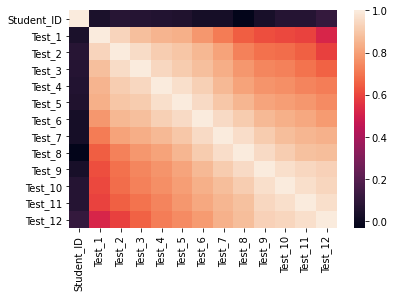

In [96]:
# Correlation map
sns.heatmap(a.corr())

In [97]:
x=a[['Student_ID', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5',
       'Test_6', 'Test_7', 'Test_8', 'Test_9', 'Test_10', 'Test_11',
       'Test_12']]
y=a[ 'Test_6']

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [99]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
print(lr.intercept_)

8.384404281969182e-13


In [101]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
Student_ID,-4.012042e-17
Test_1,-1.008556e-15
Test_2,1.478821e-15
Test_3,-3.303056e-16
Test_4,5.308093e-16
Test_5,1.588638e-17
Test_6,1.000000e+00
Test_7,1.004473e-15
Test_8,1.783305e-16
Test_9,-6.241567e-17


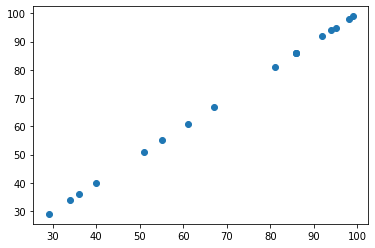

In [102]:
#Predicting

prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [103]:
# Score

print(lr.score(x_test,y_test))


1.0


In [104]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [105]:
#Ridge Score
rr.score(x_test,y_test)

0.9999855729632662

In [106]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [107]:
# Lasso Score
la.score(x_test,y_test)

0.9991412657014358

In [108]:
# ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [109]:
print(en.coef_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.54767864e-02 9.70662732e-01 1.15004782e-02
 0.00000000e+00 0.00000000e+00 3.91295804e-05 0.00000000e+00
 0.00000000e+00]


In [110]:
print(en.intercept_)

0.12446543275135014


In [111]:
print(en.predict(x_test))

[98.89013567 85.93539648 85.98229639 97.69632828 60.98292928 36.03330759
 92.03398069 29.2270174  66.98054562 93.72564983 51.23018661 81.03977935
 85.81239995 55.00504587 40.24456594 94.82235025 33.97967425]


In [112]:
print(en.score(x_test,y_test))

0.9999576014144879


In [113]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error: 1.8808484181885004e-14


In [114]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))

Mean Squared Error: 5.315994429536418e-28


In [115]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error: 2.30564403790707e-14


# DataSet WorldData

In [116]:
a=pd.read_csv(r"E:\Python Data Science\Documents\18_world-data-2023 - 18_world-data-2023.csv")
a

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [117]:
a.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [118]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [119]:
a.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [120]:
a.isna()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
b=a.fillna(value=25)
b

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,25,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",25,25,25,25,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,25,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,25,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [122]:
b.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

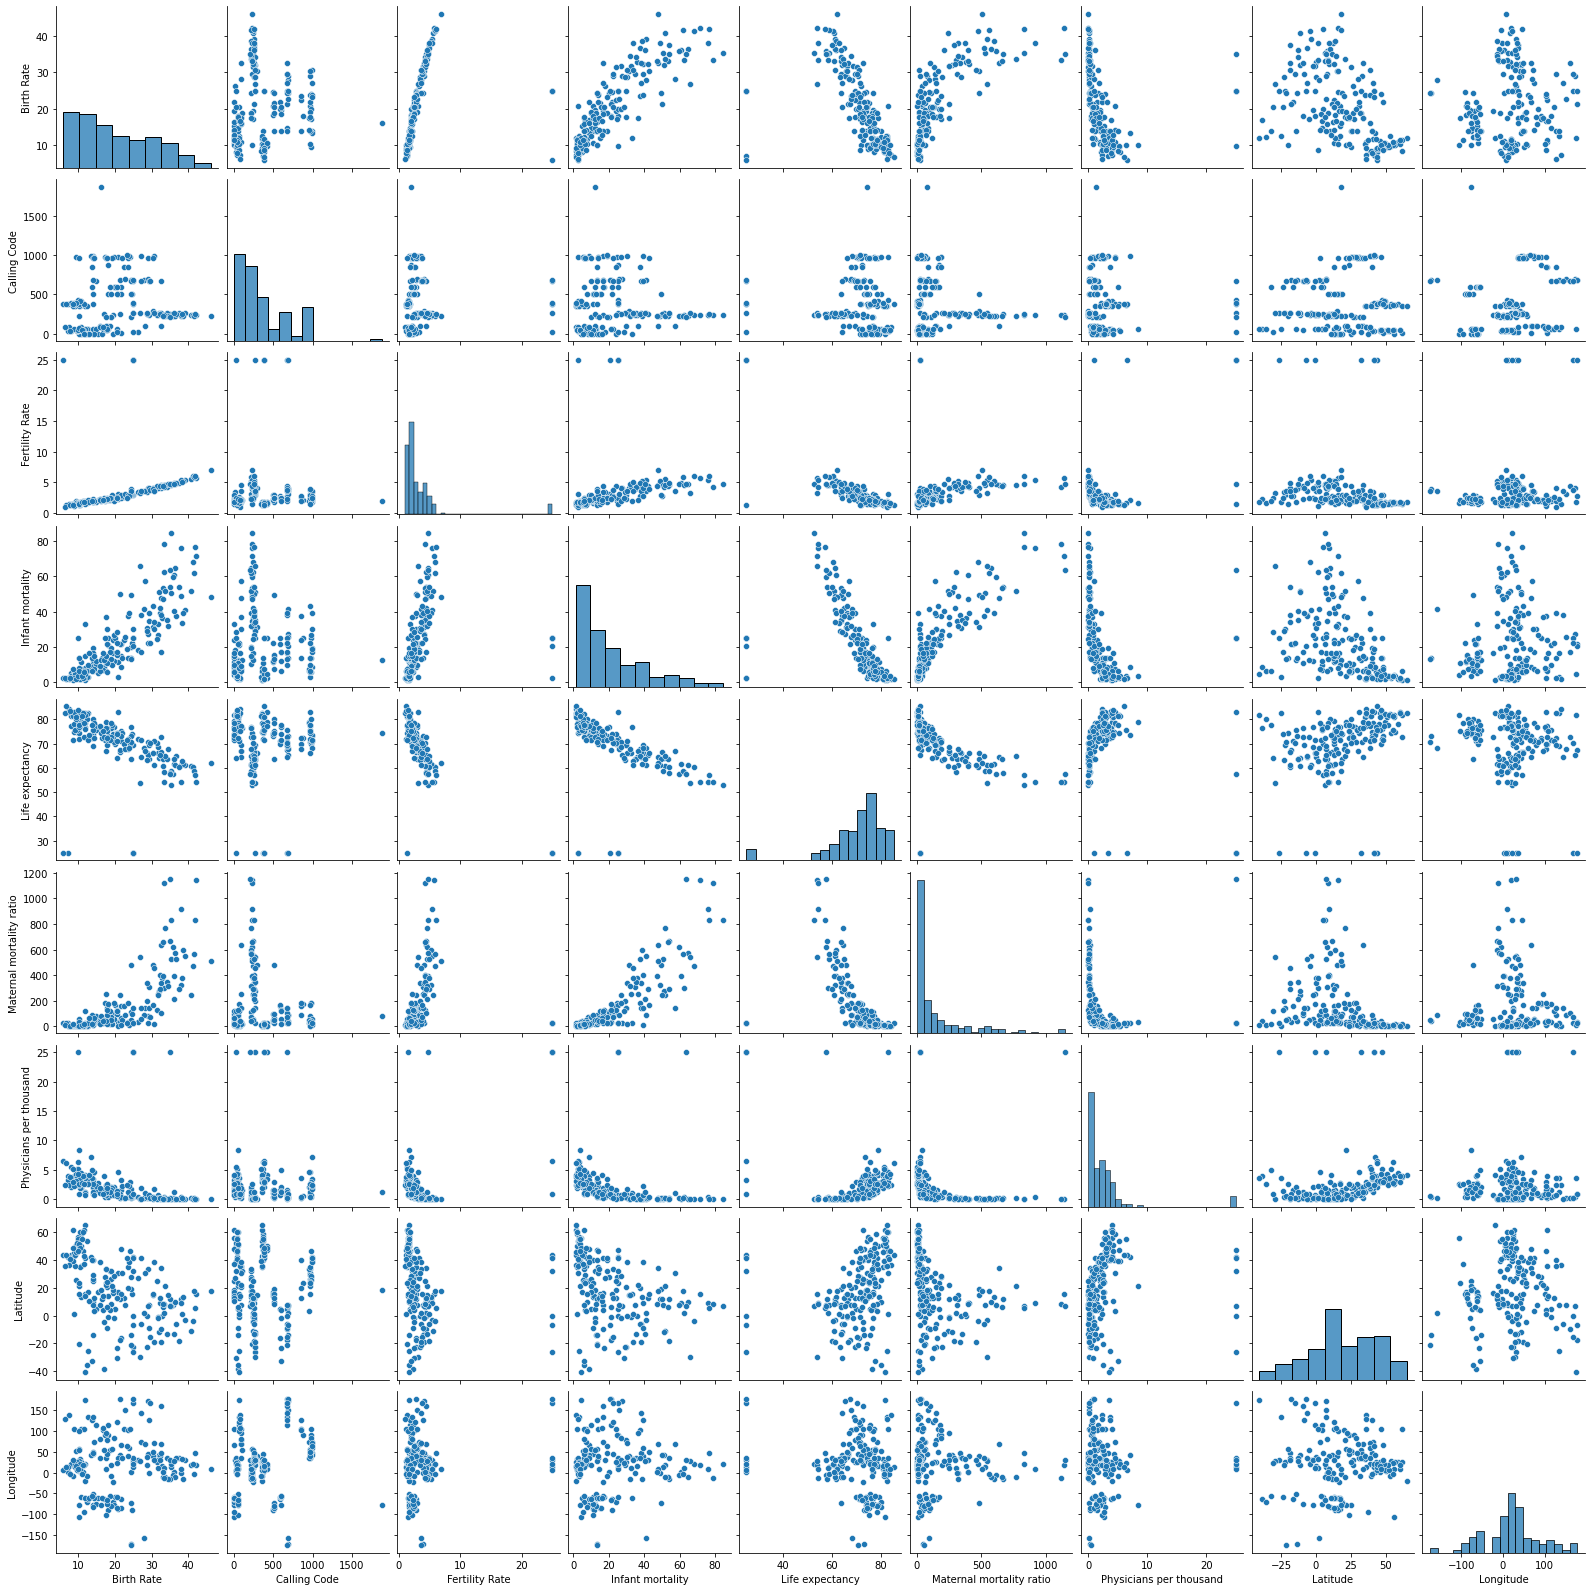

In [123]:
sns.pairplot(b)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calling Code', ylabel='Density'>

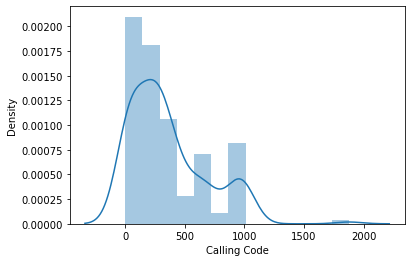

In [124]:
#normal distribution
sns.distplot(b['Calling Code'])

<AxesSubplot:>

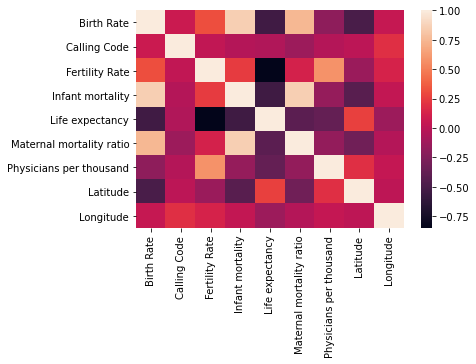

In [125]:
# Correlation map
sns.heatmap(b.corr())

In [126]:
x=b[['Latitude','Longitude']]
y=b['Longitude']

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [128]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [129]:
print(lr.intercept_)

0.0


In [130]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff


,Co-efficient
Latitude,8.825562e-17
Longitude,1.000000e+00


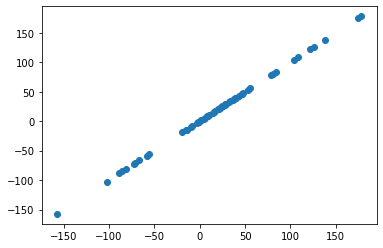

In [131]:
#Predicting

prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [132]:
# Score

print(lr.score(x_test,y_test))

1.0


In [133]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [134]:
#Ridge Score
rr.score(x_test,y_test)

0.9999999997353113

In [135]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [136]:
# Lasso Score
la.score(x_test,y_test)

0.9999951340892111

In [137]:
# ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [138]:
print(en.coef_)

[0.         0.99977956]


In [139]:
print(en.intercept_)

0.004608646603266209


In [140]:
print(en.predict(x_test))


[-157.33753092   17.22914183   43.35194306  -80.75971075   46.86338382
    9.50429907   46.19404041   -1.55664012   -9.68989883   27.84780154
  108.25793903   25.48482055  -14.44456748  -58.42634     -15.30215539
  125.70443228   78.95008208   47.47590777   55.484353    104.17703682
   32.28776558   20.16849374   21.00583712   14.37685573  -55.74893334
   39.77817303   23.88061926   80.75860032    6.13284044   53.68081966
  178.03038801   -1.0183598    33.42709837   25.01270165   37.90244561
  138.22705618  121.75178179   38.99282719   10.27024019    1.6638688
    4.47355929  -85.18383728   21.8241097    -3.43060693  174.8520278
 -102.52556863  -88.47353294    1.52607418   15.8287786     8.08449312
   28.36823979  -66.57044232  -19.0120334    29.15303875  -71.52258943
   84.11007236   36.23503425   -8.23746407  -72.26467181]


In [141]:
print(en.score(x_test,y_test))

0.9999999513516179


In [142]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error: 1.4225908586722344e-15


In [143]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))

Mean Squared Error: 6.2039230512296524e-30


In [144]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error: 2.4907675626661058e-15
